In [1]:
%matplotlib inline

import os

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def _get_files_from_archive(casename, nmonths, start_month=1):
    files = []
    rootdir = os.path.join(os.sep, 'glade', 'scratch', 'mlevy', 'archive', casename, 'ocn', 'hist')
    for month in range(start_month, start_month+nmonths):
        files.append(os.path.join(rootdir, f'{casename}.pop.h.nday1.0001-0{month}-01.nc'))
        if not os.path.exists(files[-1]):
            raise FileNotFoundError(f'Can not find {files[-1]}')
    return files

def _get_files_from_rundir(casename, nmonths, start_month):
    files = []
    rootdir = os.path.join(os.sep, 'glade', 'scratch', 'mlevy', casename, 'run')
    for month in range(start_month, start_month+nmonths):
        files.append(os.path.join(rootdir, f'{casename}.pop.h.nday1.0001-0{month}-01.nc'))
        if not os.path.exists(files[-1]):
            raise FileNotFoundError(f'Can not find {files[-1]}')
    return files

def _get_timeseries_from_files(files):
    for file in files:
        print(file)
    ds = xr.open_mfdataset(files, combine='nested', concat_dim='time', decode_times=False)
    print(f'Files contain a total of {ds.sizes["time"]} days')
    return ds['HMXL_2'].isel(nlon=897, nlat=142).compute()

In [3]:
%%time

# Case 001 daily HMXL
# January through March are in the archive with old name
files_001 = _get_files_from_archive('g.e22.G1850ECO_JRA_HR.TL319_g17.001', 3)

# April is still in the rundir with new name
files_001 += _get_files_from_rundir('g.e22.G1850ECO_JRA_HR.TL319_t13.001', 1, 4)

da_001 = _get_timeseries_from_files(files_001)

/glade/scratch/mlevy/archive/g.e22.G1850ECO_JRA_HR.TL319_g17.001/ocn/hist/g.e22.G1850ECO_JRA_HR.TL319_g17.001.pop.h.nday1.0001-01-01.nc
/glade/scratch/mlevy/archive/g.e22.G1850ECO_JRA_HR.TL319_g17.001/ocn/hist/g.e22.G1850ECO_JRA_HR.TL319_g17.001.pop.h.nday1.0001-02-01.nc
/glade/scratch/mlevy/archive/g.e22.G1850ECO_JRA_HR.TL319_g17.001/ocn/hist/g.e22.G1850ECO_JRA_HR.TL319_g17.001.pop.h.nday1.0001-03-01.nc
/glade/scratch/mlevy/g.e22.G1850ECO_JRA_HR.TL319_t13.001/run/g.e22.G1850ECO_JRA_HR.TL319_t13.001.pop.h.nday1.0001-04-01.nc
Files contain a total of 114 days
CPU times: user 2.93 s, sys: 3.62 s, total: 6.55 s
Wall time: 9.5 s


In [4]:
%%time

# Case 002 daily HMXL
# January through April are in the archive
files_002 = _get_files_from_archive('g.e22.G1850ECO_JRA_HR.TL319_t13.002', 4)

# May is still in the rundir
files_002 += _get_files_from_rundir('g.e22.G1850ECO_JRA_HR.TL319_t13.002', 1, 5)

da_002 = _get_timeseries_from_files(files_002)

/glade/scratch/mlevy/archive/g.e22.G1850ECO_JRA_HR.TL319_t13.002/ocn/hist/g.e22.G1850ECO_JRA_HR.TL319_t13.002.pop.h.nday1.0001-01-01.nc
/glade/scratch/mlevy/archive/g.e22.G1850ECO_JRA_HR.TL319_t13.002/ocn/hist/g.e22.G1850ECO_JRA_HR.TL319_t13.002.pop.h.nday1.0001-02-01.nc
/glade/scratch/mlevy/archive/g.e22.G1850ECO_JRA_HR.TL319_t13.002/ocn/hist/g.e22.G1850ECO_JRA_HR.TL319_t13.002.pop.h.nday1.0001-03-01.nc
/glade/scratch/mlevy/archive/g.e22.G1850ECO_JRA_HR.TL319_t13.002/ocn/hist/g.e22.G1850ECO_JRA_HR.TL319_t13.002.pop.h.nday1.0001-04-01.nc
/glade/scratch/mlevy/g.e22.G1850ECO_JRA_HR.TL319_t13.002/run/g.e22.G1850ECO_JRA_HR.TL319_t13.002.pop.h.nday1.0001-05-01.nc
Files contain a total of 124 days
CPU times: user 3.76 s, sys: 5.36 s, total: 9.12 s
Wall time: 12.9 s


In [5]:
%%time

# Case 003 daily HMXL
# January and February are in the archive
files_003 = _get_files_from_archive('g.e22.G1850ECO_JRA_HR.TL319_t13.003', 2)

# Nothing in the rundir for now
# files_003 += _get_files_from_rundir('g.e22.G1850ECO_JRA_HR.TL319_t13.003', 1, 3)

da_003 = _get_timeseries_from_files(files_003)

/glade/scratch/mlevy/archive/g.e22.G1850ECO_JRA_HR.TL319_t13.003/ocn/hist/g.e22.G1850ECO_JRA_HR.TL319_t13.003.pop.h.nday1.0001-01-01.nc
/glade/scratch/mlevy/archive/g.e22.G1850ECO_JRA_HR.TL319_t13.003/ocn/hist/g.e22.G1850ECO_JRA_HR.TL319_t13.003.pop.h.nday1.0001-02-01.nc
Files contain a total of 59 days
CPU times: user 1.6 s, sys: 1.49 s, total: 3.09 s
Wall time: 4.25 s


In [6]:
%%time

# Case 003 daily HMXL
# January is in the archive
files_004 = _get_files_from_archive('g.e22.G1850ECO_JRA_HR.TL319_t13.004', 1)

# February is in the rundir
files_004 += _get_files_from_rundir('g.e22.G1850ECO_JRA_HR.TL319_t13.004', 1, 2)

da_004 = _get_timeseries_from_files(files_004)

/glade/scratch/mlevy/archive/g.e22.G1850ECO_JRA_HR.TL319_t13.004/ocn/hist/g.e22.G1850ECO_JRA_HR.TL319_t13.004.pop.h.nday1.0001-01-01.nc
/glade/scratch/mlevy/g.e22.G1850ECO_JRA_HR.TL319_t13.004/run/g.e22.G1850ECO_JRA_HR.TL319_t13.004.pop.h.nday1.0001-02-01.nc
Files contain a total of 45 days
CPU times: user 1.56 s, sys: 1.39 s, total: 2.94 s
Wall time: 3.63 s


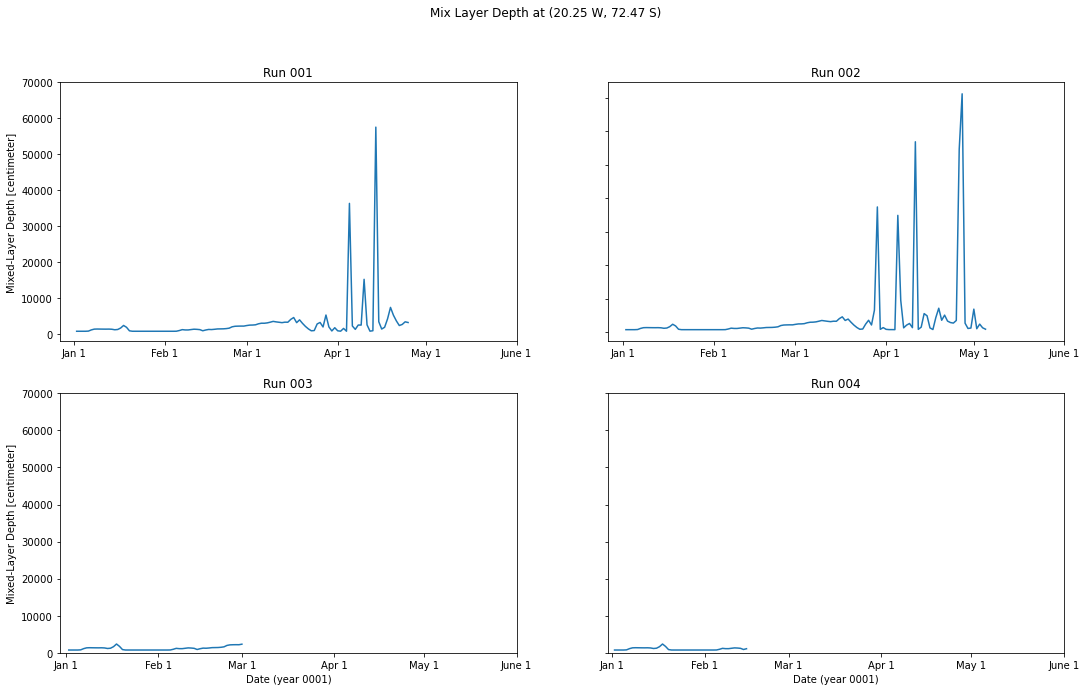

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18.0, 10.5))
xticks = 365 + np.array([0, 31, 59, 90, 120, 151])
xlabels = ['Jan 1', 'Feb 1', 'Mar 1', 'Apr 1', 'May 1', 'June 1']
yticks=np.linspace(0, 7e4, 8)

long_west = 360 - da_001['TLONG'].data
lat_south = -da_001['TLAT'].data
fig.suptitle(f'Mix Layer Depth at ({long_west:.2f} W, {lat_south:.2f} S)')

plt.subplot(221)
da_001.plot()
plt.title('Run 001')
plt.xticks(xticks, xlabels)
plt.xlabel('')
plt.yticks(yticks)

plt.subplot(222)
da_002.plot()
plt.title('Run 002')
plt.xticks(xticks, xlabels)
plt.xlabel('')
plt.yticks(yticks, '')
plt.ylabel('')

plt.subplot(223)
da_003.plot()
plt.title('Run 003')
plt.xticks(xticks, xlabels)
plt.xlabel('Date (year 0001)')
plt.yticks(yticks)

plt.subplot(224)
da_004.plot()
plt.title('Run 004')
plt.xticks(xticks, xlabels)
plt.xlabel('Date (year 0001)')
plt.yticks(yticks, '')
plt.ylabel('')

plt.show()